In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns; sns.set()
from sklearn.cross_validation import train_test_split
#import xgboost as xgb
from sklearn.metrics import roc_auc_score
import utils_new as utils

In [2]:
train = pd.read_csv('data_train.csv', index_col=0)

In [3]:
test = pd.read_csv('data_eval.csv', index_col=0)

Ghost = 169626  
Electron = 5610  
Muon = 29839  
Pion = 774220  
Kaon = 138261  
Proton = 81951

In [4]:
old_features = {'Electron': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                             'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                             'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                             'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                             'RichAboveKaThres', 'MuonBkgLL', 'MuonMuLL', 'MuonIsMuon',
                             'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon', 'EcalPIDe',
                             'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Ghost': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                          'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                          'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                          'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                          'RichAboveKaThres', 'MuonBkgLL', 'MuonMuLL', 'MuonIsMuon',
                          'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon', 'EcalPIDe', 
                          'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Kaon': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                         'RichAboveKaThres', 'RichAbovePrThres', 'MuonBkgLL', 'MuonMuLL',
                         'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                         'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe',
                         'InAccBrem', 'BremPIDe'],
                'Muon': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                         'RichAboveKaThres', 'MuonBkgLL', 'MuonMuLL', 'MuonNShared',
                         'InAccEcal', 'EcalPIDe', 'EcalPIDmu', 'InAccHcal', 'HcalPIDe',
                         'HcalPIDmu', 'InAccPrs', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Pion': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                         'RichAboveKaThres', 'MuonBkgLL', 'MuonMuLL',
                         'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                         'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe',
                         'InAccBrem', 'BremPIDe'],
                'Proton': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                           'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                           'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                           'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                           'RichAboveKaThres', 'RichAbovePrThres', 'MuonBkgLL', 'MuonMuLL',
                           'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                           'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'CaloPrsE',
                           'PrsPIDe', 'InAccBrem', 'BremPIDe']}

In [5]:
pid_dict = {"Ghost": 0,
            "Electron": 11,
            "Muon": 13,
            "Pion": 211,
            "Kaon": 321,
            "Proton": 2212
}

In [6]:
target = np.abs(train.MCParticleType.values)
mask = np.array([i not in [0, 11, 13, 211, 321, 2212] for i in np.abs(train.MCParticleType.values)])
target[mask] = np.zeros(mask.sum())

y_test = np.abs(test.MCParticleType.values)
mask = np.array([i not in [0, 11, 13, 211, 321, 2212] for i in np.abs(test.MCParticleType.values)])
y_test[mask] = np.zeros(mask.sum())

In [7]:
target = np.abs(train.MCParticleType.values)

target_m = np.zeros(target.shape)
target_m[target == pid_dict['Ghost']] = 0
target_m[target == pid_dict['Muon']] = 1
target_m[target == pid_dict['Pion']] = 2
target_m[target == pid_dict['Kaon']] = 3
target_m[target == pid_dict['Proton']] = 4
target_m[target == pid_dict['Electron']] = 5

y_train = target_m.copy()

y_test = np.abs(test.MCParticleType.values)

target_m = np.zeros(y_test.shape)
target_m[y_test == pid_dict['Ghost']] = 0
target_m[y_test == pid_dict['Muon']] = 1
target_m[y_test == pid_dict['Pion']] = 2
target_m[y_test == pid_dict['Kaon']] = 3
target_m[y_test == pid_dict['Proton']] = 4
target_m[y_test == pid_dict['Electron']] = 5

y_test = target_m.copy()

In [8]:
ndict = {'Ghost': 0, 'Muon': 1, 'Pion': 2, 'Kaon': 3, 'Proton': 4, 'Electron': 5}

train_w = np.ones(train.shape[0])
for p in ndict.keys():
    pw = train.shape[0]/(y_train == ndict[p]).sum()
    train_w[y_train == ndict[p]] *= pw
    
test_w = np.ones(test.shape[0])
for p in ndict.keys():
    pw = test.shape[0]/(y_test == ndict[p]).sum()
    test_w[y_test == ndict[p]] *= pw 

In [9]:
from hep_ml.uboost import uBoostClassifier

In [13]:
def get_uboost(train, y_train, test, y_test, pid, feature_dict):
    ub = uBoostClassifier(['TrackP', 'TrackPt'], 1, np.ones(y_train.shape).astype('bool'), n_threads=12)
    
    ub.fit(train[feature_dict[pid]], (y_train == ndict[pid]).astype('int'), train_w)
    
    preds = ub.predict_proba(test[feature_dict[pid]])[:, 1]
    return preds

In [ ]:
ghost_preds = get_uboost(train, y_train, test, y_test, 'Ghost', old_features)
muon_preds = get_uboost(train, y_train, test, y_test, 'Muon', old_features)
pion_preds = get_uboost(train, y_train, test, y_test, 'Pion', old_features)
kaon_preds = get_uboost(train, y_train, test, y_test, 'Kaon', old_features)
proton_preds = get_uboost(train, y_train, test, y_test, 'Proton', old_features)
ele_preds = get_uboost(train, y_train, test, y_test, 'Electron', old_features)

In [11]:
ele_preds = get_uboost(train, test, 'Electron', old_features)
ghost_preds = get_uboost(train, test, 'Ghost', old_features)
muon_preds = get_uboost(train, test, 'Muon', old_features)
pion_preds = get_uboost(train, test, 'Pion', old_features)
kaon_preds = get_uboost(train, test, 'Kaon', old_features)
proton_preds = get_uboost(train, test, 'Proton', old_features)

TypeError: get_uboost() takes exactly 6 arguments (4 given)

## One-vs-all test

In [15]:
#target_m = np.zeros(y_test.shape)
#target_m[y_test == pid_dict['Ghost']] = 0
#target_m[y_test == pid_dict['Muon']] = 1
#target_m[y_test == pid_dict['Pion']] = 2
#target_m[y_test == pid_dict['Kaon']] = 3
#target_m[y_test == pid_dict['Proton']] = 4
#target_m[y_test == pid_dict['Electron']] = 5
target_m = y_test

preds = np.zeros((len(ele_preds), 6))
preds[:, 0] = ghost_preds
preds[:, 1] = muon_preds
preds[:, 2] = pion_preds
preds[:, 3] = kaon_preds
preds[:, 4] = proton_preds
preds[:, 5] = ele_preds

label_list = ['Ghost', 'Muon', 'Pion', 'Kaon', 'Proton', 'Electron']

utils_new.py:97: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  new_labels[:, cl] = (labels == cl) * 1.
/home/libfun/vrtr/local/lib/python2.7/site-packages/IPython/core/formatters.py:90: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/libfun/vrtr/local/lib/python2.7/site-packages/IPython/core/formatters.py:667: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


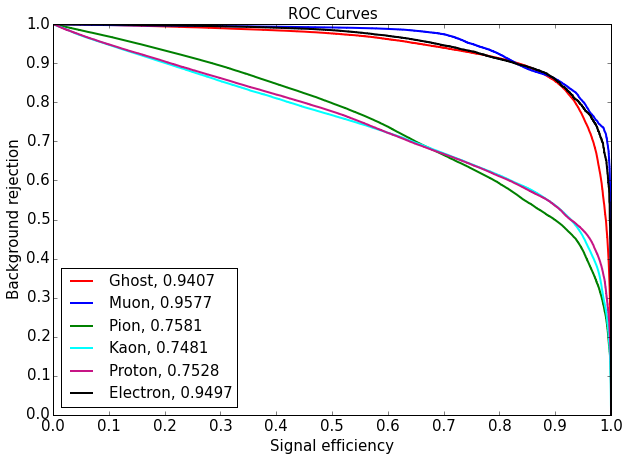

In [16]:
utils.get_roc_curves(y_test, preds, label_list)

/home/libfun/vrtr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/home/libfun/vrtr/local/lib/python2.7/site-packages/jupyter_core/application.py:106: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  help="""Generate default config file."""
/home/libfun/vrtr/local/lib/python2.7/site-packages/jupyter_core/application.py:110: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  help="Specify a config file to load."
/home/libfun/vrtr/local/lib/python2.7/site-packages/jupyter_core/application.py:118: DeprecationWarning: metada

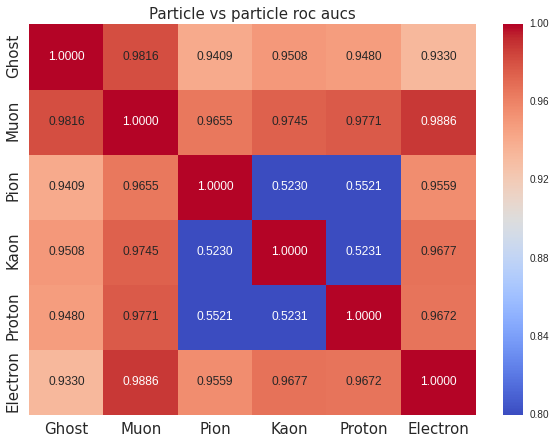

In [17]:
mat = utils.get_roc_auc_matrix(target_m, preds, label_list)

In [18]:
mat2 = pd.read_csv('./PID/python/class_vs_class_roc_auc_matrix_baseline.csv', index_col=0)

/home/libfun/vrtr/local/lib/python2.7/site-packages/seaborn/matrix.py:134: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/home/libfun/vrtr/local/lib/python2.7/site-packages/seaborn/matrix.py:142: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


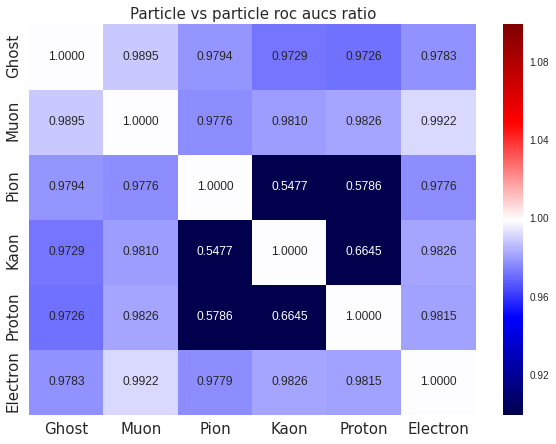

,Ghost,Muon,Pion,Kaon,Proton,Electron
Ghost,1.000000,0.989505,0.979450,0.972896,0.972575,0.978258
Muon,0.989505,1.000000,0.977631,0.980952,0.982558,0.992208
Pion,0.979450,0.977606,1.000000,0.547698,0.578596,0.977612
Kaon,0.972896,0.980952,0.547698,1.000000,0.664500,0.982626
Proton,0.972575,0.982558,0.578596,0.664500,1.000000,0.981536
Electron,0.978259,0.992211,0.977933,0.982594,0.981540,1.000000


In [19]:
utils.get_roc_auc_ratio_matrix(mat, mat2)

utils_new.py:553: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  roc_auc = roc_auc_score(one_labels, probas[:, one_class] / probas[:, two_class], sample_weight=weights)
utils_new.py:554: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  fpr, tpr, _ = roc_curve(one_labels, probas[:, one_class] / probas[:, two_class], sample_weight=weights)


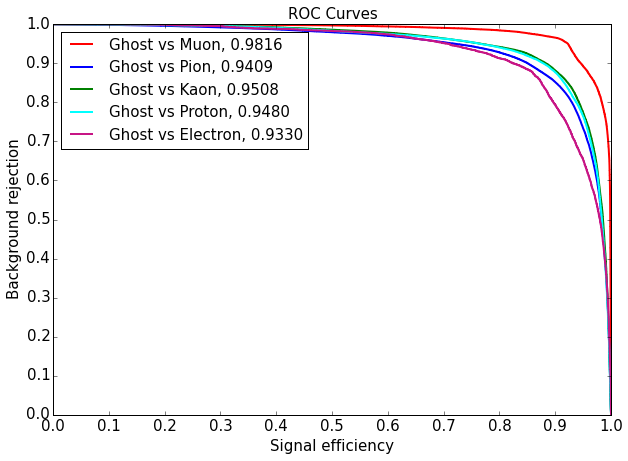

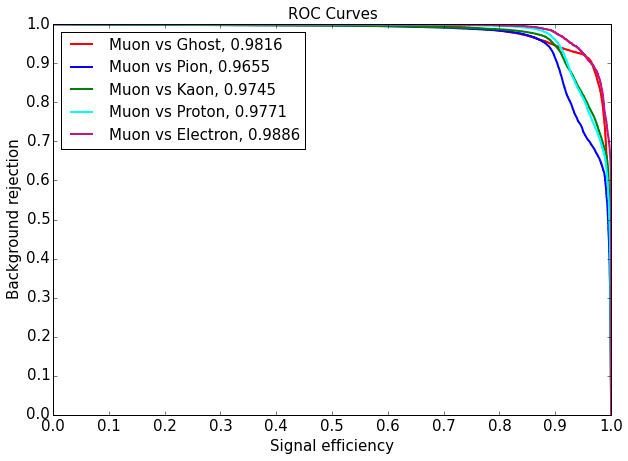

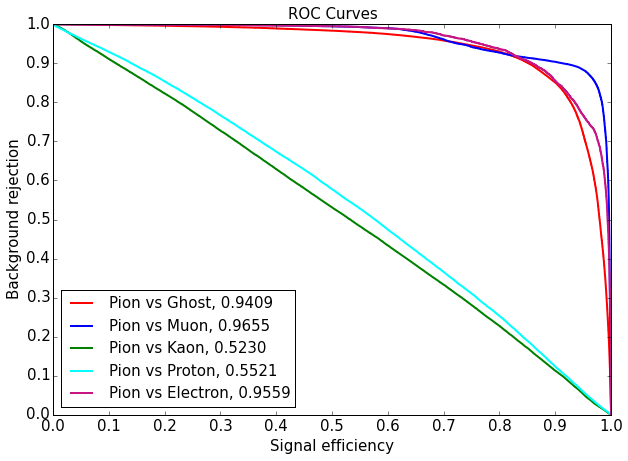

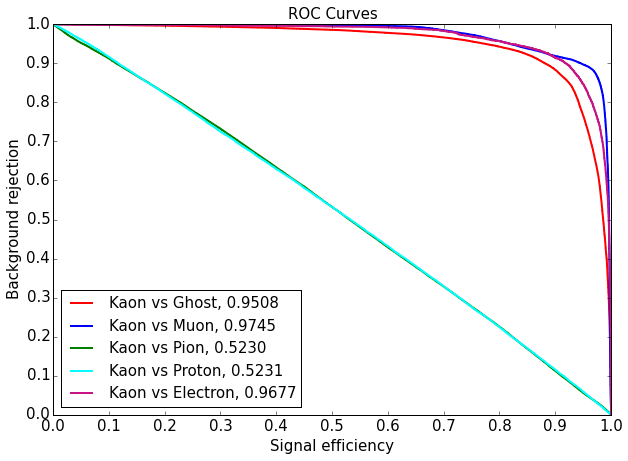

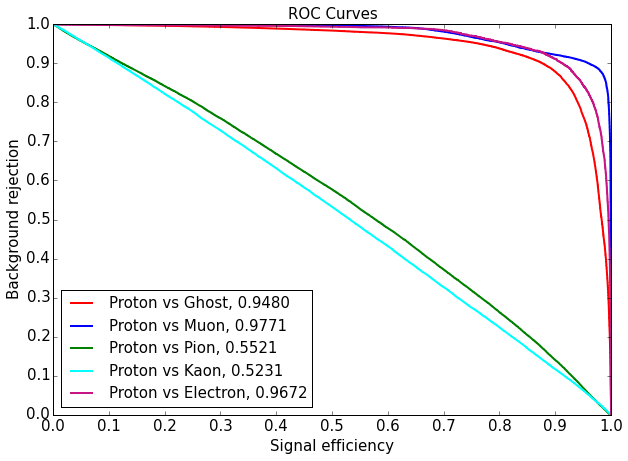

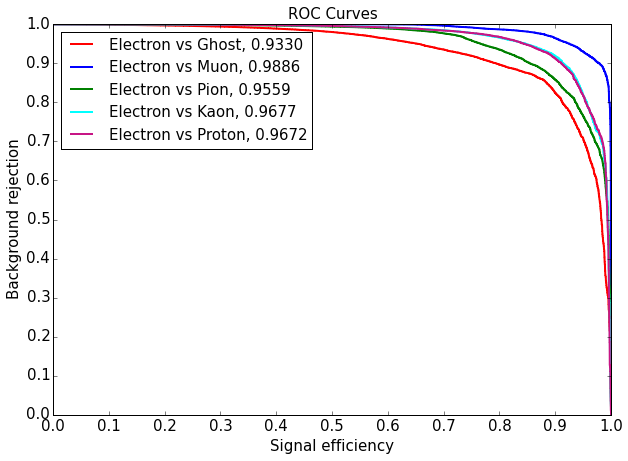

In [20]:
utils.get_one_vs_one_roc_curves(target_m, preds, label_list)

In [21]:
fl = utils.get_flatness_table(test, target_m, preds, label_list)

In [22]:
fl

,TrackP,TrackPt,P_Conf_level,Pt_Conf_level
Ghost,0.001442,0.002091,0.000863,0.000871
Muon,0.009006,0.005179,0.000881,0.000905
Pion,0.008188,0.006716,0.000852,0.000853
Kaon,0.012488,0.005056,0.000878,0.000875
Proton,0.009055,0.005252,0.000898,0.000884
Electron,0.009015,0.003128,0.000988,0.000981


In [23]:
flatness_baseline = pd.read_csv("./PID/python/flatness_baseline.csv", index_col=0)
utils.get_flatness_ratio(fl, flatness_baseline)

,TrackP,TrackPt
Ghost,0.218723,0.147358
Muon,0.441747,0.115121
Pion,0.495865,0.489208
Kaon,0.289918,0.137934
Proton,0.261464,0.117843
Electron,1.377152,0.188676


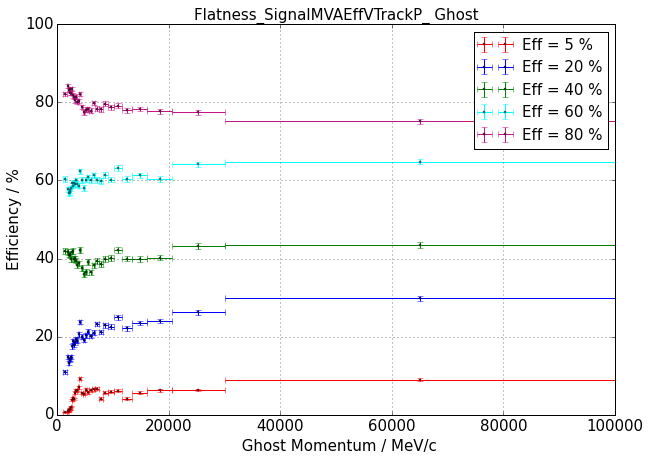

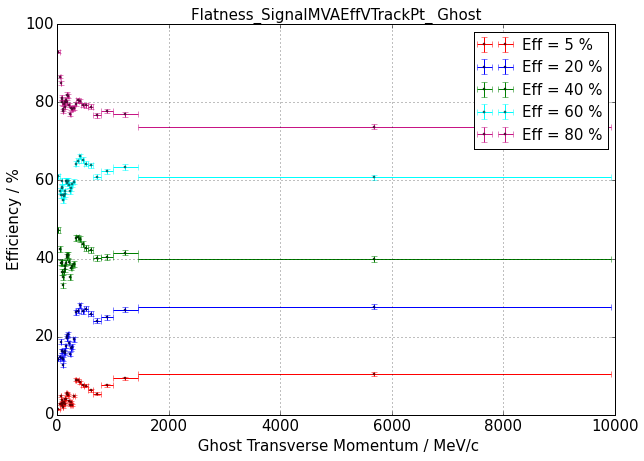

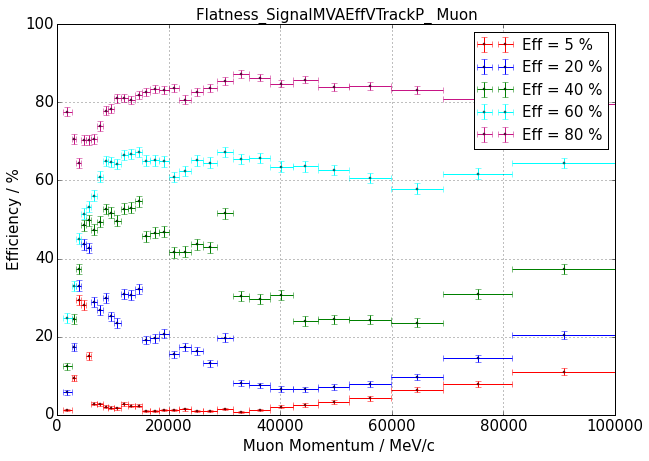

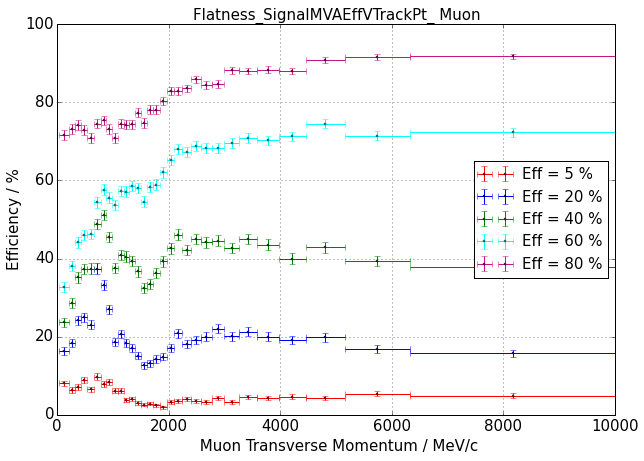

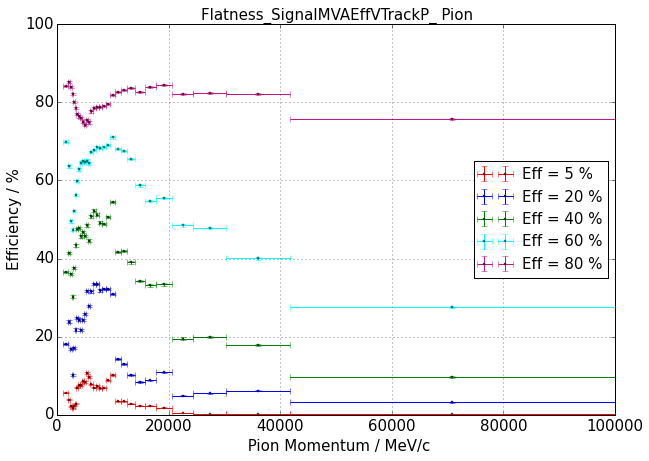

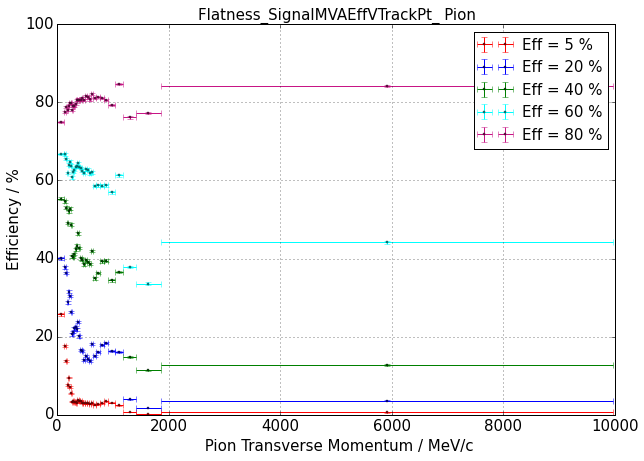

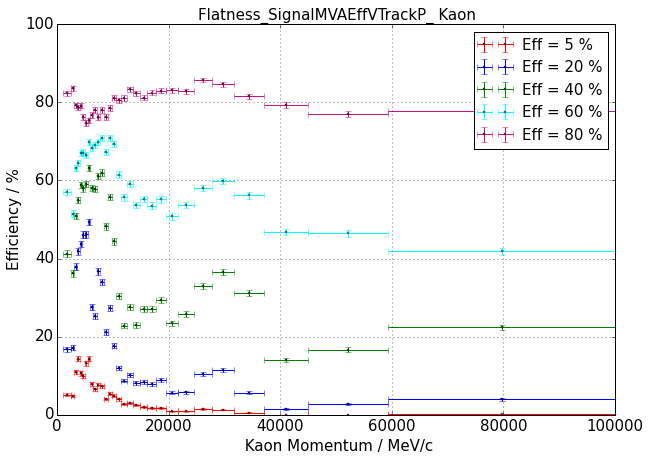

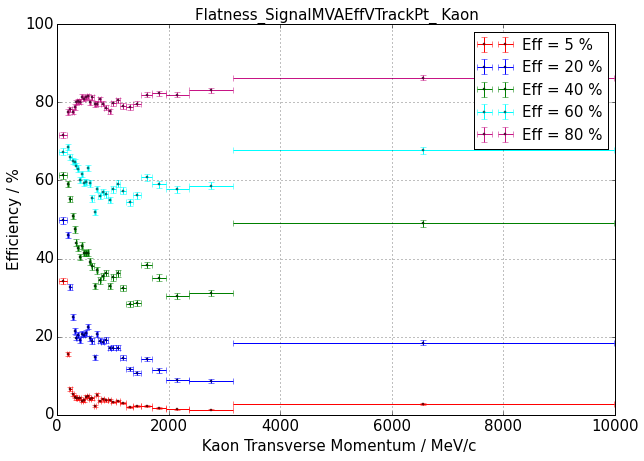

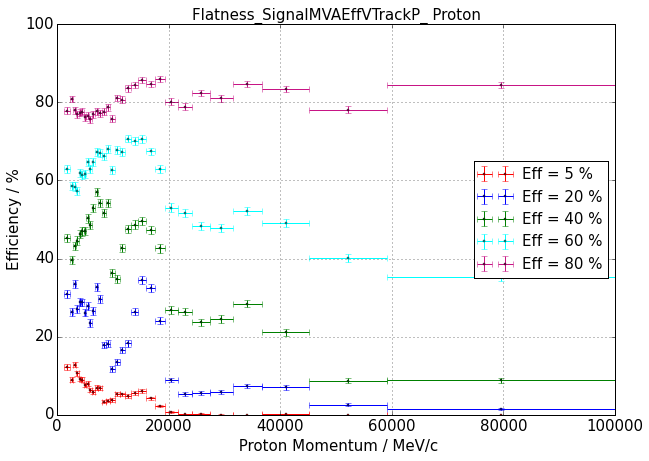

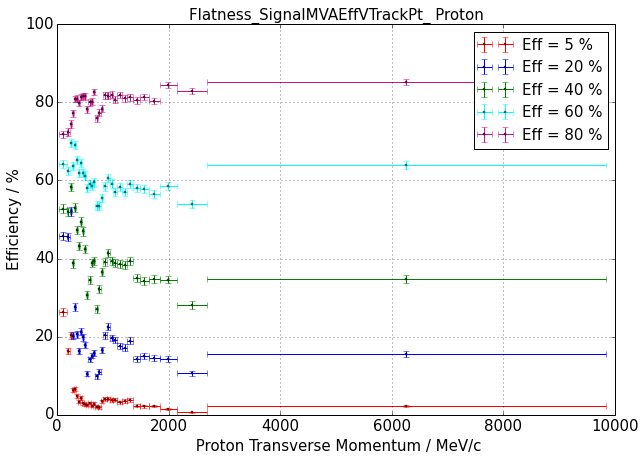

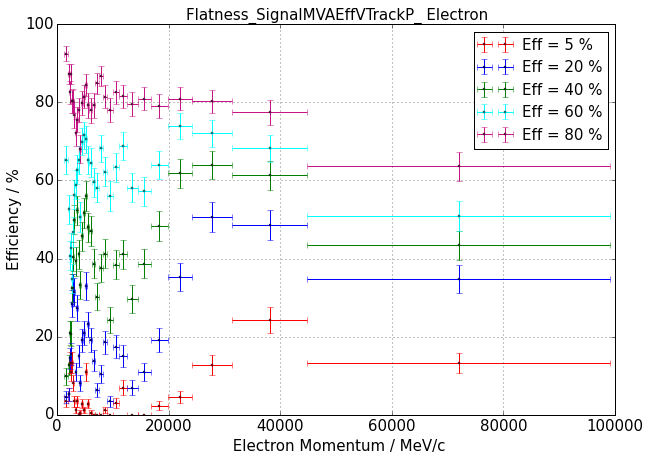

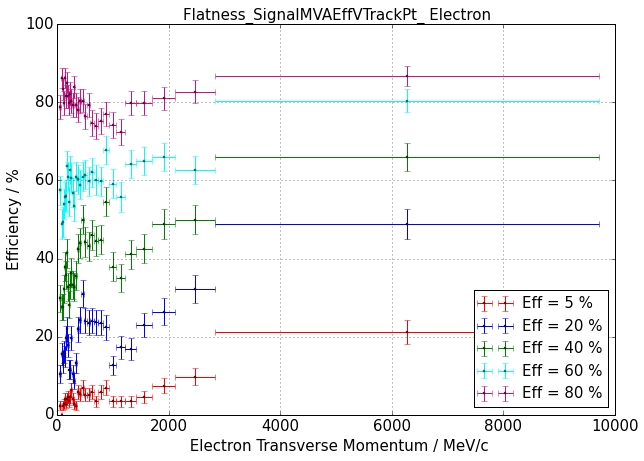

In [24]:
utils.get_all_flatness_figures(test, preds, target_m, '', label_list, show=True)

In [25]:
from itertools import combinations
from sklearn.metrics import log_loss

auc_sum = 0.0

for ind1, ind2 in combinations(range(6), 2):
    auc_sum += mat.iloc[ind1, ind2]
print('Avg. pairwise ROC AUC:', auc_sum / 15)

print('Logloss:', log_loss(target_m, preds))

print('Mean flatness:', fl[['TrackP', 'TrackPt']].values.mean())

('Avg. pairwise ROC AUC:', 0.87659715621417134)
('Logloss:', 1.7011701112698407)
('Mean flatness:', 0.0063847032786097623)
